In [16]:
import pandas as pd
import numpy as np
from numpy import absolute
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return

In [3]:
df = pd.read_csv("/content/S_n_I_A_N_P_An_Io_noaa2.txt", header=None, delimiter=r"\s+")
df.columns =['SAM', 'nino', 'ISMR', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD']
df.drop(columns=['SAM'], inplace=True)
df.head()

,nino,ISMR,AMO,NAO,PDO,At-nino,IOD
0,0.167651,10.24380,0.484010,0.000837,1.084100,0.560382,-0.295856
1,0.212788,44.16110,0.603261,-0.317969,-1.465790,1.189540,-0.032952
2,0.336627,4.76807,0.609364,0.423296,0.114019,0.783738,-0.644708
3,0.575112,-63.58770,0.219494,0.352545,1.807430,0.560395,-0.295477
4,0.647786,12.57720,0.040233,-0.528239,-0.108867,0.727379,0.044719


**For Delay=0**

In [4]:
x = df[['nino', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD']]
y = df[['ISMR']]

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train.values.ravel())

In [24]:
print(grid.best_params_)

In [ ]:
preds = grid.predict(x_test)
rmse = np.sqrt(mse(y_test, preds))
print("RMSE: %f" % (rmse))

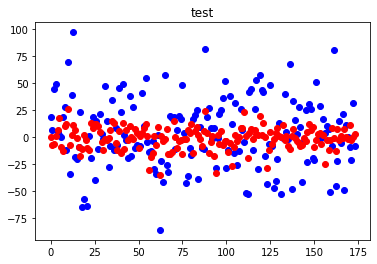

In [31]:
a = list(y_test['ISMR'])
b = list(preds)
plotGraph(a, b, "test")

In [32]:
d = {'Actual':a,'Predicted':b}
table = pd.DataFrame(d)
table.head()

,Actual,Predicted
0,19.08540,-0.060938
1,6.34669,-7.778689
2,44.57960,-6.236887
3,49.26400,1.391587
4,5.04096,6.262956


**For Delay=1**

In [33]:
df_x = df[['nino', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD']]
df_y = df[['ISMR']]

In [34]:
for i in range(5,870,6):
  df_x.drop(i, axis=0, inplace=True)
  df_y.drop(i-5, axis=0, inplace=True)

  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
x_train,x_test,y_train,y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train.values.ravel())

In [37]:
print(grid.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [38]:
preds = grid.predict(x_test)
rmse = np.sqrt(mse(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 35.205828


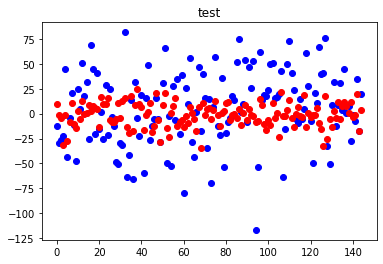

In [39]:
a = list(y_test['ISMR'])
b = list(preds)
plotGraph(a, b, "test")

In [40]:
d = {'Actual':a,'Predicted':b}
table = pd.DataFrame(d)
table.head()

,Actual,Predicted
0,-12.0237,9.139784
1,-29.7590,-1.333928
2,-26.3479,-4.199895
3,-22.6666,-31.084169
4,44.3629,-1.417111


**For Delay=2**

In [41]:
df_x = df[['nino', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD']]
df_y = df[['ISMR']]

In [42]:
for i in range(4,870,6):
  df_x.drop([i,i+1], axis=0, inplace=True)
  df_y.drop([i-4,i-3], axis=0, inplace=True)

  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
x_train,x_test,y_train,y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train.values.ravel())

In [45]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [46]:
preds = grid.predict(x_test)
rmse = np.sqrt(mse(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 31.293141


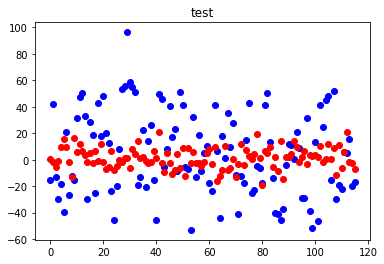

In [47]:
a = list(y_test['ISMR'])
b = list(preds)
plotGraph(a, b, "test")

In [48]:
d = {'Actual':a,'Predicted':b}
table = pd.DataFrame(d)
table.head()

,Actual,Predicted
0,-15.2392,0.644127
1,41.9579,-2.112664
2,-12.8886,-5.673194
3,-29.4760,-0.699366
4,-18.5653,9.842244


**For Delay=3**

In [49]:
df_x = df[['nino', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD']]
df_y = df[['ISMR']]

In [50]:
for i in range(3,870,6):
  df_x.drop([i,i+1,i+2], axis=0, inplace=True)
  df_y.drop([i-3,i-2,i-1], axis=0, inplace=True)

  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
x_train,x_test,y_train,y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train.values.ravel())

In [53]:
print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [54]:
preds = grid.predict(x_test)
rmse = np.sqrt(mse(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 32.914432


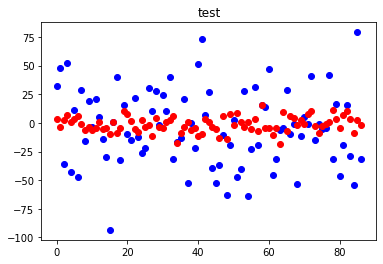

In [55]:
a = list(y_test['ISMR'])
b = list(preds)
plotGraph(a, b, "test")

In [56]:
d = {'Actual':a,'Predicted':b}
table = pd.DataFrame(d)
table.head()

,Actual,Predicted
0,31.9474,3.625836
1,47.7556,-3.356074
2,-35.6310,2.519549
3,52.2632,6.532650
4,-42.9772,0.730384


**For Delay=4**

In [57]:
df_x = df[['nino', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD']]
df_y = df[['ISMR']]

In [58]:
for i in range(2,870,6):
  df_x.drop([i,i+1,i+2,i+3], axis=0, inplace=True)
  df_y.drop([i-2,i-1,i,i+1], axis=0, inplace=True)

  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
x_train,x_test,y_train,y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train.values.ravel())

In [61]:
print(grid.best_params_)

{'C': 100, 'gamma': 1, 'kernel': 'linear'}


In [62]:
preds = grid.predict(x_test)
rmse = np.sqrt(mse(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 33.613193


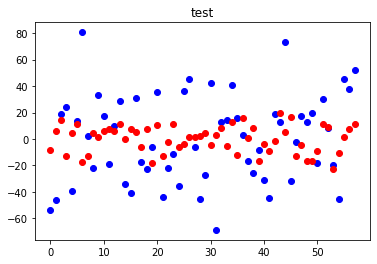

In [63]:
a = list(y_test['ISMR'])
b = list(preds)
plotGraph(a, b, "test")

In [64]:
d = {'Actual':a,'Predicted':b}
table = pd.DataFrame(d)
table.head()

,Actual,Predicted
0,-53.6298,-8.566398
1,-45.9158,5.745693
2,18.8287,14.569784
3,24.4369,-12.770314
4,-39.5128,4.346788


**For Delay=5**

In [65]:
df_x = df[['nino', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD']]
df_y = df[['ISMR']]

In [66]:
for i in range(1,870,6):
  df_x.drop([i,i+1,i+2,i+3,i+4], axis=0, inplace=True)
  df_y.drop([i-1,i,i+1,i+2,i+3], axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [67]:
x_train,x_test,y_train,y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train.values.ravel())

In [69]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [70]:
preds = grid.predict(x_test)
rmse = np.sqrt(mse(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 29.570156


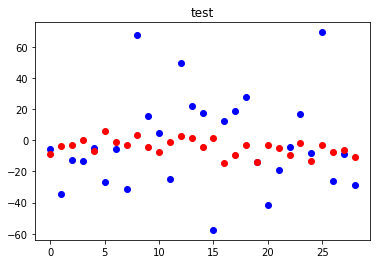

In [71]:
a = list(y_test['ISMR'])
b = list(preds)
plotGraph(a, b, "test")

In [72]:
d = {'Actual':a,'Predicted':b}
table = pd.DataFrame(d)
table.head()

,Actual,Predicted
0,-5.53155,-9.076790
1,-34.46720,-3.974182
2,-12.62450,-3.151468
3,-13.49940,0.091186
4,-4.88418,-6.881941


**Comparing RMSE Values, clearly a Delay of 5 months gives the best result. The data also reduces every time we try to make a prediction, so even a delay of 2 months gives satisfactory results. This clearly shows that the correlation of events happening in different parts of the world climatically has a delayed result on the Indian Monsoon as it should.**